# Parse and Merge University Crime Data to one CSV File

In [42]:
import numpy as np
University_Folder=np.genfromtxt('University_Folder.csv',delimiter=',',dtype='str')
University_Folder.sort()
University_Folder

array(['Boston_University', 'Carlow_University',
       'Carnegie_Mellon_University', 'Chatham_University',
       'Columbia_University', 'Concordia_University',
       'Cornell_University', 'Duquesne_University', 'Emory_University',
       'Fordham_University',
       'Georgia_Institute_of_Technology_Main_Campus',
       'Georgia_State_University', 'Lewis_&_Clark_College',
       'Los_Angeles_City_College',
       'Metropolitan_State_University_of_Denver', 'New_York_University',
       'Northeastern_University', 'Northern_Arizona_University',
       'Northwestern_University', 'Ohio_State_University',
       'Oregon_State_University', 'Pace_University',
       'Portland_State_University', 'Portland_State_University',
       'Richland_College', 'San_Francisco_State_University',
       'Syracuse_University', 'Texas_A&M_University_College_Station',
       'The_University_of_Texas_at_Austin',
       'Univeristy_of_Illinois_Champaign', 'Universidad_Del_Turabo',
       'University_of_Arizona

In [43]:
university_unique=np.unique(University_Folder)

In [44]:
Crime_Categories=np.genfromtxt('Crime_Categories.csv',delimiter=',',dtype='str')
Crime_Categories

array(['Criminal_Offenses', 'Hate_Crimes', 'VAWA_Offenses'], dtype='<U17')

In [45]:
Location=np.genfromtxt('Location.csv',delimiter=',',dtype='str')
Location

array(['Noncampus', 'On_campus', 'On_campus_Student_Housing_Facilities',
       'Public_Property', 'Reported_by_Local_State_Police'], dtype='<U36')

## Read in all the files download from https://ope.ed.gov/campussafety/#/

In [46]:
def readfile(a,b,c):
    path=a+'/'+b+'_'+c+'.csv'
    table=pd.read_csv(path,sep=',').fillna(0)
    table['Location']=c
    return table

In [47]:
my_dict={}
for university in university_unique:
    for category in Crime_Categories[:2]:
        for location in Location:
            x=university+'_'+category+'_'+location
            my_dict[x]=readfile(university,category,location)

## Read in all files excecpt files about VAWA Crime

In [48]:
for university in university_unique:
    for location in Location:
        n=my_dict[university+'_'+Crime_Categories[1]+'_'+location]
        n['Hate_Crimes']=n.iloc[:,6:len(n.columns)-1].sum(axis=1)
        frames=[my_dict[university+'_'+Crime_Categories[0]+'_'+location],n['Hate_Crimes']]
        my_dict[university+'_'+location]=pd.concat(frames,axis=1)

## Merge the dict in to one dataframe

In [49]:
data=pd.DataFrame()
for university in university_unique:
    for location in Location:
        data=data.append(my_dict[university+'_'+location],sort=False)
        
data

,Survey year,Unitid,Institution name,Campus ID,Campus Name,Institution Size,Murder/Non-negligent manslaughter,Negligent manslaughter,Sex offenses - Forcible,Rape,...,Incest,Statutory rape,Robbery,Aggravated assault,Burglary,Motor vehicle theft,Arson,Location,Hate_Crimes,There are no data to download.
0,2001.0,164988.0,Boston University,1.0,Boston University Charles River Campus,27756.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Noncampus,0.0,NaN
1,2002.0,164988.0,Boston University,1.0,Boston University Charles River Campus,28982.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Noncampus,0.0,NaN
2,2003.0,164988.0,Boston University,1.0,Boston University Charles River Campus,29049.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,Noncampus,0.0,NaN
3,2004.0,164988.0,Boston University,1.0,Boston University Charles River Campus,29596.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.0,0.0,Noncampus,0.0,NaN
4,2005.0,164988.0,Boston University,1.0,Boston University Charles River Campus,30957.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Noncampus,0.0,NaN
5,2006.0,164988.0,Boston University,1.0,Boston University Charles River Campus,31574.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,Noncampus,0.0,NaN
6,2007.0,164988.0,Boston University,1.0,Boston University Charles River Campus,32053.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,4.0,10.0,0.0,0.0,Noncampus,0.0,NaN
7,2008.0,164988.0,Boston University,1.0,Boston University Charles River Campus,31766.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,4.0,0.0,0.0,Noncampus,0.0,NaN
8,2009.0,164988.0,Boston University,1.0,Boston University Charles River Campus,31960.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,Noncampus,0.0,NaN
9,2010.0,164988.0,Boston University,1.0,Boston University Charles River Campus,32727.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,Noncampus,0.0,NaN


## Save the file to local

In [50]:
data.to_csv('full_data_final.csv',sep=',')

# Parse and Merge VAWA Crime files into one csv file

In [53]:
my_dict_1={}
for university in university_unique:
        for location in Location:
            x=university+'_'+Crime_Categories[2]+'_'+location
            my_dict_1[x]=readfile(university,Crime_Categories[2],location)

In [54]:
data=pd.DataFrame()
for university in university_unique:
    for location in Location:
        data=data.append(my_dict_1[university+'_'+Crime_Categories[2]+'_'+location],sort=False)
        
data

,Survey year,Unitid,Institution name,Campus ID,Campus Name,Institution Size,Domestic violence,Dating violence,Stalking,Location,There are no data to download.
0,2014.0,164988.0,Boston University,1.0,Boston University Charles River Campus,32112.0,0.0,0.0,0.0,Noncampus,NaN
1,2015.0,164988.0,Boston University,1.0,Boston University Charles River Campus,32158.0,0.0,0.0,0.0,Noncampus,NaN
2,2016.0,164988.0,Boston University,1.0,Boston University Charles River Campus,32695.0,0.0,0.0,0.0,Noncampus,NaN
0,2014.0,164988.0,Boston University,1.0,Boston University Charles River Campus,32112.0,0.0,8.0,15.0,On_campus,NaN
1,2015.0,164988.0,Boston University,1.0,Boston University Charles River Campus,32158.0,4.0,5.0,12.0,On_campus,NaN
2,2016.0,164988.0,Boston University,1.0,Boston University Charles River Campus,32695.0,7.0,5.0,15.0,On_campus,NaN
0,2014.0,164988.0,Boston University,1.0,Boston University Charles River Campus,32112.0,0.0,7.0,5.0,On_campus_Student_Housing_Facilities,NaN
1,2015.0,164988.0,Boston University,1.0,Boston University Charles River Campus,32158.0,3.0,4.0,4.0,On_campus_Student_Housing_Facilities,NaN
2,2016.0,164988.0,Boston University,1.0,Boston University Charles River Campus,32695.0,4.0,4.0,8.0,On_campus_Student_Housing_Facilities,NaN
0,2014.0,164988.0,Boston University,1.0,Boston University Charles River Campus,32112.0,0.0,0.0,0.0,Public_Property,NaN


# Save the file to local

In [ ]:
data.to_csv('full_data_VAWA.csv',sep=',')

# Plot the VAWA Crime Rate Based on Location and Crime Categories

In [55]:
import pandas as pd
import csv
import numpy as np
University_VAWA=pd.read_csv('full_data_VAWA.csv',delimiter=',',header=0)

In [56]:
df_VAWA=pd.DataFrame(University_VAWA)
df_VAWA['Crime_Total']=df_VAWA['Domestic violence']+df_VAWA['Dating violence']+df_VAWA['Stalking']
df_VAWA['Crime_Rate']=df_VAWA['Crime_Total']/df_VAWA['Institution Size']*100
df_VAWA_Sort=df_VAWA.sort_values(by=['Crime_Rate'])
df_VAWA_group=df_VAWA.groupby(['Location']).sum()
df_result=df_VAWA_group[['Crime_Total','Domestic violence','Dating violence','Stalking']]
df_new=df_result[:4]
df_new

,Crime_Total,Domestic violence,Dating violence,Stalking
Location,,,,
Noncampus,250.0,148.0,42.0,60.0
On_campus,3208.0,786.0,750.0,1672.0
On_campus_Student_Housing_Facilities,1227.0,369.0,394.0,464.0
Public_Property,221.0,119.0,64.0,38.0


In [57]:
a=df_result.columns.values
b=list(a[1:])
c_list=b*4
df_group=df_result[['Domestic violence','Dating violence','Stalking']]


## Plot the donut plot

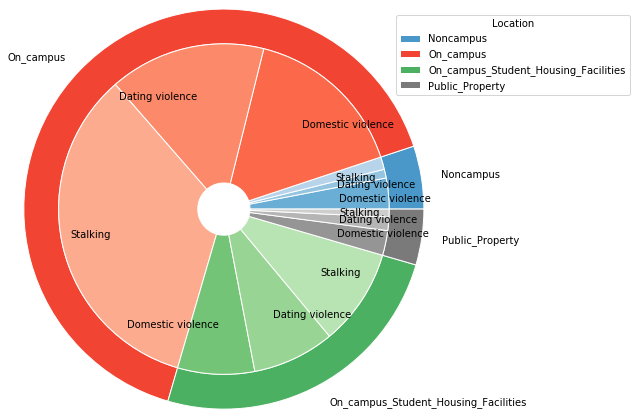

In [59]:
import matplotlib.pyplot as plt
group_names=['Noncampus', 'On_campus', 'On_campus_Student_Housing_Facilities',
             'Public_Property']
group_size=df_new['Crime_Total'].values
subgroup_names=c_list
subgroup_size=[148.0,42.0,60.0,786.0,750.0,1672.0,369.0,394.0,464.0,119.0,64.0,
               38.0]
# Create colors
a, b, c,d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Greys]
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.3, labels=group_names, colors=[a(0.6),
                                                    b(0.6), c(0.6), d(0.6)] )
plt.setp( mypie, width=0.4, edgecolor='white')
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size,radius=2.3-0.4,labels=subgroup_names,
            labeldistance=0.7,colors=[a(0.5), a(0.4), a(0.3), 
                                      b(0.5), b(0.4), b(0.3),
                                      c(0.5), c(0.4), c(0.3), 
                                      d(0.5), d(0.4), d(0.3)])
plt.setp( mypie2, width=1.6, edgecolor='white')
plt.margins(0,0)
#legend
ax.legend(group_names,
          title="Location",
          loc="best",
          bbox_to_anchor=(1, 1))
# show it
plt.show()
